In [702]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import tensorflow as tf
import matplotlib.pyplot as plt
import os
import csv
import string
import requests
import io
from zipfile import ZipFile
#from tensorflow.contrib import learn


In [703]:
import pandas as pd
#import textblob
#from textblob import TextBlob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

df=pd.read_csv("C:/Users/jdiaz/Desktop/CVs.csv")


In [704]:
df.head()

,seq,texto;;;;;;;;;;;;;;;;;;;;;;;
0,0,page 1 of 2 juan matias doder ingeniero en sistemas argentina experiencia intelutio...
1,1,about mecontactskillsemiliano hotesweb developer32 years oldsingleargentinoespinosa 1533 floor 2...
2,"2,gastón matías ramón falcone billing operations latam @ level 3 communications mobile:​ (+54 9...",NaN
3,3,nicolas machado contacto telefono: +54 (0351) 157334077 email: nicolas.machado@outlook.com.a...
4,4,contactarwww.linkedin.com/in/gonzalozunino (linkedin)aptitudes principalesjavascriptreactjsre...


In [705]:
df.shape

(20, 2)

# Pre procesamiento de datos

In [706]:
df1=df["texto;;;;;;;;;;;;;;;;;;;;;;;"]
df2=df["seq"]

In [707]:
serie = pd.Series(df1)
serie.dropna( inplace=True )
serie

0     page 1 of 2     juan matias doder         ingeniero en sistemas argentina experiencia  intelutio...
1     about mecontactskillsemiliano hotesweb developer32 years oldsingleargentinoespinosa 1533 floor 2...
3      nicolas machado  contacto  telefono: +54 (0351) 157334077  email: nicolas.machado@outlook.com.a...
4        contactarwww.linkedin.com/in/gonzalozunino (linkedin)aptitudes principalesjavascriptreactjsre...
5     página1david chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta  en ...
8     curriculum vitae de:cesar acarapidatos personales:dni: 94061208floresta  capital federal  argent...
10    barrio néstor kirchner manzana a  sector 1 depto 4. san martín (mendoza) (+54) 2634 568 287 dari...
13    curriculum  vitaedatos personalesapellido y nombre: garcía abel leonardodirección: buenos aires ...
14             datos personales   nombres y apellido:  andrés omar del papa    domicilio:      palmas ...
15      gastón gregorio blas acevedo  cordero

In [708]:
data_combined = {key: [value] for (key, value) in df1.items()}

# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
0,page 1 of 2 juan matias doder ingeniero en sistemas argentina experiencia intelutions 2020 proyecto educativo para el estado de puer...
1,about mecontactskillsemiliano hotesweb developer32 years oldsingleargentinoespinosa 1533 floor 2capital federald.n.i 32.300.181html 5011 2066-2226...
2,NaN
3,nicolas machado contacto telefono: +54 (0351) 157334077 email: nicolas.machado@outlook.com.ar ubicación: cordoba argentina lenguajes españo...
4,contactarwww.linkedin.com/in/gonzalozunino (linkedin)aptitudes principalesjavascriptreactjsreduxlanguagesespañol (native or bilingual)inglés (f...
5,página1david chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio de 2015 - actualidad (1 año 9 mes...
6,NaN
7,NaN
8,curriculum vitae de:cesar acarapidatos personales:dni: 94061208floresta capital federal argentinatel.: (011) 1563369430/ (011) 46370115domicilio...
9,NaN


In [709]:
data_df['transcript'].dtype

dtype('O')

In [710]:
data_df.dropna( inplace=True )
data_df

,transcript
0,page 1 of 2 juan matias doder ingeniero en sistemas argentina experiencia intelutions 2020 proyecto educativo para el estado de puer...
1,about mecontactskillsemiliano hotesweb developer32 years oldsingleargentinoespinosa 1533 floor 2capital federald.n.i 32.300.181html 5011 2066-2226...
3,nicolas machado contacto telefono: +54 (0351) 157334077 email: nicolas.machado@outlook.com.ar ubicación: cordoba argentina lenguajes españo...
4,contactarwww.linkedin.com/in/gonzalozunino (linkedin)aptitudes principalesjavascriptreactjsreduxlanguagesespañol (native or bilingual)inglés (f...
5,página1david chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio de 2015 - actualidad (1 año 9 mes...
8,curriculum vitae de:cesar acarapidatos personales:dni: 94061208floresta capital federal argentinatel.: (011) 1563369430/ (011) 46370115domicilio...
10,barrio néstor kirchner manzana a sector 1 depto 4. san martín (mendoza) (+54) 2634 568 287 darioegb@gmail.com skype: darioegb https://gitlab.com/...
13,curriculum vitaedatos personalesapellido y nombre: garcía abel leonardodirección: buenos aires 1146 3dedad: 36 añosteléfono: (0351) 4924053celula...
14,datos personales nombres y apellido: andrés omar del papa domicilio: palmas de claret córdoba correo electrónico: andres...
15,gastón gregorio blas acevedo cordero 1429 – rafael castillo – la matanza teléfono: +54-11-4690-4871/+54-911-6217-4610 correo electrónico: acev...


In [711]:
import re
import string
 
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
 
round1 = lambda x: clean_text_round1(x)
 
data_clean = pd.DataFrame(data_df.transcript.apply(round1))

# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

## Bag of Words 

In [712]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common Spanish stop words
from sklearn.feature_extraction.text import CountVectorizer
import pickle
 
with open('C:/Users/jdiaz/Desktop/spanish.txt') as f:
    lines = f.read().splitlines()
 
cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm.to_pickle("dtm.pkl")
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))
 
data_dtm

C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ais', 'amos', 'an', 'as', 'bamos', 'estarã', 'estuviã', 'estã', 'fuã', 'habrã', 'habã', 'hayã', 'hubiã', 'is', 'mã', 'quã', 'ramos', 'semos', 'serã', 'seã', 'sã', 'tambiã', 'tendrã', 'tengã', 'tenã', 'tuviã', 'tãº'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,abandonado,abel,abierta,able,about,abr,abril,academia,academiadesafio,academy,...,ygerentes,yhard,zuninodesarrollador,área,áreade,áreas,ésta,ética,ópticas,última
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,2,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15,2,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,1,0,0,0,0


# Análisis exploratorio 

In [713]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,0,1,3,4,5,8,10,13,14,15,17,18
abandonado,0,0,0,0,0,0,0,0,0,2,0,0
abel,0,0,0,0,0,0,0,2,0,0,0,0
abierta,1,0,0,0,0,0,0,0,0,0,0,0
able,0,0,0,1,0,0,0,0,0,0,0,0
about,0,1,0,0,0,0,0,0,0,0,0,0


# Palabras más usadas por CV

In [714]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
print(top_dict)
# Print the top 15 words by CV
for anio, top_words in top_dict.items():
   # print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))

{0: [('sistemas', 6), ('tecnologías', 5), ('sql', 5), ('desarrollo', 5), ('software', 4), ('net', 3), ('años', 3), ('asp', 3), ('developer', 3), ('usadas', 3), ('ingeniero', 3), ('com', 2), ('meses', 2), ('page', 2), ('matias', 2), ('wcf', 2), ('vue', 2), ('linkedin', 2), ('contables', 2), ('argentina', 2), ('banco', 2), ('aplicaciones', 2), ('ajax', 2), ('juan', 2), ('enero', 2), ('of', 2), ('diciembre', 2), ('stored', 2), ('doder', 2), ('justicia', 2)], 1: [('and', 7), ('of', 7), ('may', 3), ('in', 3), ('june', 3), ('total', 2), ('subjects', 2), ('antivirus', 2), ('february', 2), ('end', 2), ('approved', 2), ('pages', 2), ('the', 2), ('responsive', 2), ('average', 2), ('layout', 2), ('design', 2), ('diagrams', 1), ('federald', 1), ('high', 1), ('developmentuniversity', 1), ('developmentcourse', 1), ('understanding', 1), ('analyst', 1), ('angular', 1), ('developerprototype', 1), ('periodic', 1), ('developerlayout', 1), ('reactjs', 1), ('ux', 1)], 3: [('argentina', 9), ('córdoba', 4), 

# Stop Words

In [715]:

# Primero saquemos las 30 palabras más importantes para cada CV
from collections import Counter
 
# Let's first pull out the top 30 words for each CV
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('sistemas', 9), ('desarrollo', 6), ('sql', 5), ('meses', 4), ('aplicaciones', 4), ('córdoba', 4), ('it', 4), ('server', 4), ('mantenimiento', 4), ('gestión', 4), ('tecnologías', 3), ('software', 3), ('net', 3), ('com', 3), ('argentina', 3), ('of', 3), ('end', 3), ('angular', 3), ('manejo', 3), ('técnico', 3), ('java', 3), ('web', 3), ('desarrollador', 3), ('empresa', 3), ('jquery', 3), ('años', 2), ('developer', 2), ('ingeniero', 2), ('page', 2), ('matias', 2), ('linkedin', 2), ('and', 2), ('may', 2), ('in', 2), ('análisis', 2), ('soporte', 2), ('red', 2), ('redes', 2), ('servicios', 2), ('base', 2), ('analista', 2), ('información', 2), ('datos', 2), ('tareas', 2), ('equipos', 2), ('configuración', 2), ('curso', 2), ('gestionar', 2), ('seguridad', 2), ('usuarios', 2), ('trabajo', 2), ('área', 2), ('informática', 2), ('asp', 1), ('usadas', 1), ('wcf', 1), ('vue', 1), ('contables', 1), ('banco', 1), ('ajax', 1), ('juan', 1), ('enero', 1), ('diciembre', 1), ('stored', 1), ('doder', 1), 

['sistemas']

In [716]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
 
# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')
 
# Add new stop words
with open('C:/Users/jdiaz/Desktop/spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['año','de','y','en','la','alex','alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)
 
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
 
# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ais', 'amos', 'an', 'as', 'bamos', 'estarã', 'estuviã', 'estã', 'fuã', 'habrã', 'habã', 'hayã', 'hubiã', 'is', 'mã', 'quã', 'ramos', 'semos', 'serã', 'seã', 'sã', 'tambiã', 'tendrã', 'tengã', 'tenã', 'tuviã', 'tãº'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Nube de Palabras

In [717]:
#!pip install wordcloud

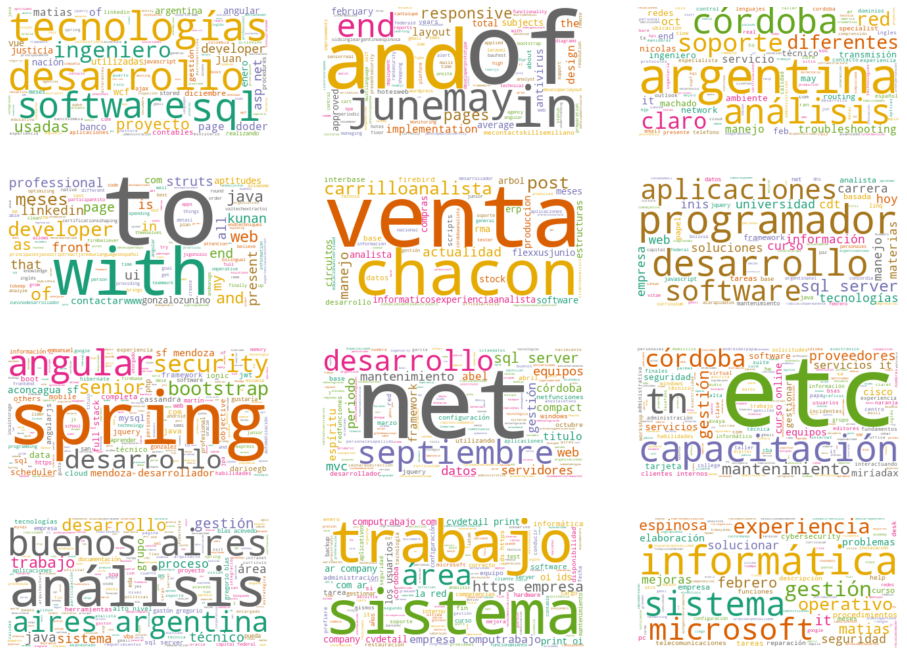

In [718]:
from wordcloud import WordCloud
 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
 
# Create subplots for each anio
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    #plt.title(anios[index])
plt.show()

In [719]:
wc.generate(data_clean.transcript[anio])

In [720]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Tokenizar

In [721]:
from nltk.tokenize import word_tokenize
data_clean['transcript_tokenized'] = data_clean['transcript'].apply(word_tokenize)
data_clean.head()
tokens=data_clean['transcript_tokenized']
print(data_clean['transcript_tokenized'])

0     [page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, proyecto, educativo, para, el, estado, de, puerto, r...
1     [about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n, i, hotes, gmail, y, end, developerlayout, of, re...
3     [nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cordoba, argentina, lenguajes, español, –, ingles, ex...
4     [contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreactjsreduxlanguagesespañol, native, or, bilingual, in...
5     [chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexxusjunio, de, actualidad, año, meses, analista, de,...
8     [curriculum, vitae, de, cesar, acarapidatos, personales, dni, capital, federal, argentinatel, concordia, en, la, paz, bolivia, el, de, febrero, de...
10    [barrio, néstor, kirchner, manzana, a, sector, depto, san,

In [722]:
import pandas as pd
from nltk import word_tokenize
from nltk import FreqDist

data_clean['transcript']
data_clean['transcript'].map(word_tokenize)
sum(data_clean['transcript'].map(word_tokenize), [])
freq=FreqDist(sum(data_clean['transcript'].map(word_tokenize), []))

In [723]:
type(data_clean['transcript'].map(word_tokenize))

pandas.core.series.Series

In [724]:
type(sum(data_clean['transcript'].map(word_tokenize), []))

list

C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 61565 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 61613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 61565 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 61613 missing from current font.
  font.load_char(ord(s), flags=flags)


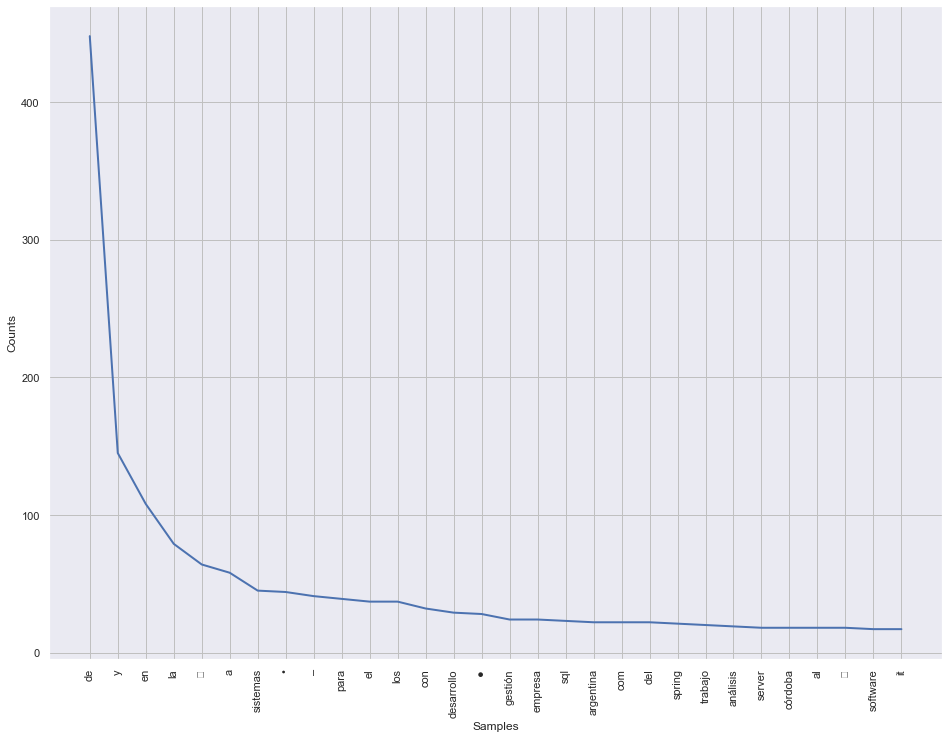

In [725]:
#Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

# Eliminar Palabras de Parada

In [726]:
from nltk.corpus import stopwords
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [727]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jdiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [728]:
stop_words=set(stopwords.words("spanish"))
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 61565 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 61613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 61565 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 61613 missing from current font.
  font.load_char(ord(s), flags=flags)


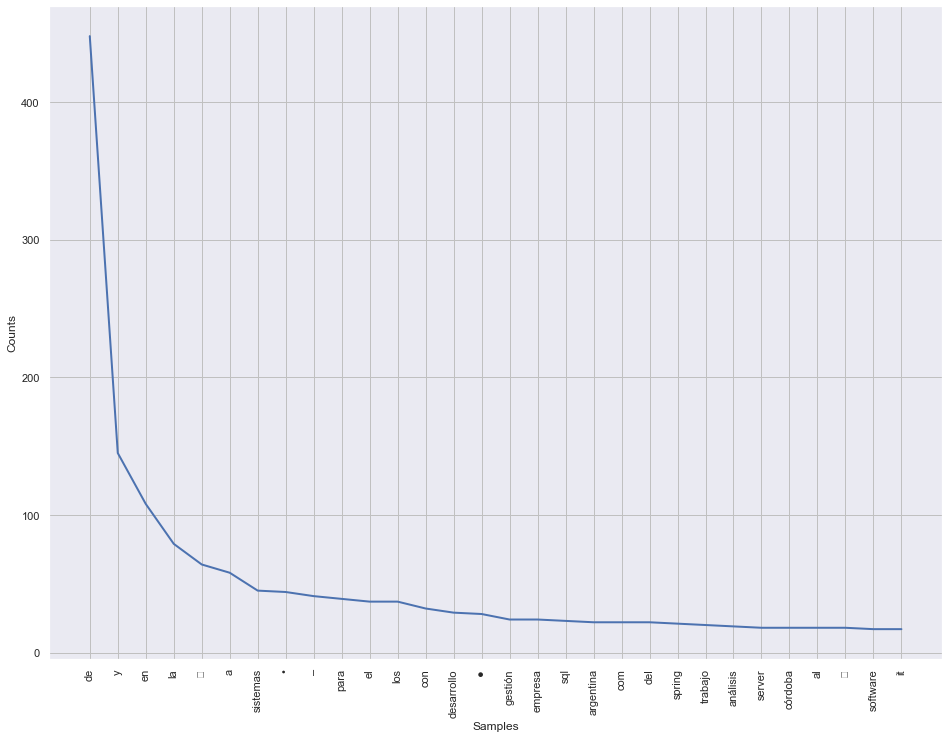

In [729]:
#Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq_limpia.plot(30, cumulative=False)

In [730]:
from nltk.corpus import stopwords

clean_tokens = data_clean['transcript'][:]
 
for token in data_clean['transcript']:
 
    if token in stopwords.words('spanish'):
 
        clean_tokens.remove(data_clean['transcript'])

In [731]:
print(clean_tokens)

0     page  of      juan matias doder         ingeniero en sistemas argentina experiencia  intelutions   proyecto educativo para el estado de puerto ric...
1     about mecontactskillsemiliano hotesweb  years oldsingleargentinoespinosa  floor  federald n i       hotes gmail          y   end developerlayout o...
3      nicolas machado  contacto  telefono         email  nicolas machado outlook com ar  ubicación  cordoba  argentina  lenguajes español – ingles expe...
4        contactarwww linkedin com in gonzalozunino  linkedin aptitudes principalesjavascriptreactjsreduxlanguagesespañol  native or bilingual inglés  f...
5      chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta  en   flexxusjunio de      actualidad   año  meses analista de pos...
8     curriculum vitae de cesar acarapidatos personales dni    capital federal  argentinatel             concordia  en la paz bolivia el  de febrero de ...
10    barrio néstor kirchner manzana a  sector  depto   san mart

In [732]:
stop_words_sp = set(stopwords.words('spanish'))

In [733]:
data_clean

,transcript,transcript_tokenized
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educativo para el estado de puerto ric...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, proyecto, educativo, para, el, estado, de, puerto, r..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes gmail y end developerlayout o...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n, i, hotes, gmail, y, end, developerlayout, of, re..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argentina lenguajes español – ingles expe...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cordoba, argentina, lenguajes, español, –, ingles, ex..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxlanguagesespañol native or bilingual inglés f...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreactjsreduxlanguagesespañol, native, or, bilingual, in..."
5,chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio de actualidad año meses analista de pos...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexxusjunio, de, actualidad, año, meses, analista, de,..."
8,curriculum vitae de cesar acarapidatos personales dni capital federal argentinatel concordia en la paz bolivia el de febrero de ...,"[curriculum, vitae, de, cesar, acarapidatos, personales, dni, capital, federal, argentinatel, concordia, en, la, paz, bolivia, el, de, febrero, de..."
10,barrio néstor kirchner manzana a sector depto san martín mendoza darioegb gmail com skype darioegb https gitlab com darioegb https...,"[barrio, néstor, kirchner, manzana, a, sector, depto, san, martín, mendoza, darioegb, gmail, com, skype, darioegb, https, gitlab, com, darioegb, h..."
13,curriculum vitaedatos personalesapellido y nombre garcía abel leonardodirección buenos aires añosteléfono de nacimiento córdob...,"[curriculum, vitaedatos, personalesapellido, y, nombre, garcía, abel, leonardodirección, buenos, aires, añosteléfono, de, nacimiento, córdoba, cap..."
14,datos personales nombres y apellido andrés omar del papa domicilio palmas de claret córdoba correo electrónico andres...,"[datos, personales, nombres, y, apellido, andrés, omar, del, papa, domicilio, palmas, de, claret, córdoba, correo, electrónico, andresdelpapa, gma..."
15,gastón gregorio blas acevedo cordero – rafael castillo – la matanza teléfono correo electrónico acevedo gaston gmail com ob...,"[gastón, gregorio, blas, acevedo, cordero, –, rafael, castillo, –, la, matanza, teléfono, correo, electrónico, acevedo, gaston, gmail, com, objet..."


In [734]:
from nltk.tokenize import word_tokenize
data_clean['transcript_tokenized'] = data_clean['transcript'].apply(word_tokenize)
data_clean.head()
tokens=data_clean['transcript_tokenized']
print(data_clean['transcript_tokenized'])

0     [page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, proyecto, educativo, para, el, estado, de, puerto, r...
1     [about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n, i, hotes, gmail, y, end, developerlayout, of, re...
3     [nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cordoba, argentina, lenguajes, español, –, ingles, ex...
4     [contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreactjsreduxlanguagesespañol, native, or, bilingual, in...
5     [chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexxusjunio, de, actualidad, año, meses, analista, de,...
8     [curriculum, vitae, de, cesar, acarapidatos, personales, dni, capital, federal, argentinatel, concordia, en, la, paz, bolivia, el, de, febrero, de...
10    [barrio, néstor, kirchner, manzana, a, sector, depto, san,

In [735]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline

In [736]:
!pip install fasttext

You should consider upgrading via the 'C:\Users\jdiaz\.conda\envs\Ambiente1\python.exe -m pip install --upgrade pip' command.


In [737]:
data_clean['no_contract'] = data_clean['transcript'].apply(lambda x: [contractions.fix(word) for word in x.split()])
data_clean.head()

,transcript,transcript_tokenized,no_contract
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact..."
5,chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjun...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx..."


In [738]:
data_clean['transcript_str'] = [' '.join(map(str, l)) for l in data_clean['no_contract']]
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...
5,chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjun...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...",chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio d...


In [739]:
data_clean['tokenized'] = data_clean['transcript_str'].apply(word_tokenize)
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact..."
5,chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjun...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...",chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio d...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx..."


# Quitar Mayusculas  

In [740]:
data_clean['lower'] = data_clean['tokenized'].apply(lambda x: [word.lower() for word in x])
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized,lower
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact..."
5,chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjun...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...",chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio d...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx..."


# Eliminar los signos de puntuación

In [741]:
punc = string.punctuation
data_clean['no_punc'] = data_clean['lower'].apply(lambda x: [word for word in x if word not in punc])
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized,lower,no_punc
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact..."
5,chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjun...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...",chacon carrilloanalista de sistemas informaticosexperienciaanalista post venta en flexxusjunio d...,"[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx...","[chacon, carrilloanalista, de, sistemas, informaticosexperienciaanalista, post, venta, en, flexx..."


# Eliminar las palabras "VACIAS"

In [839]:

operators = set(('nicolas', 'or', 'not','ufo7d','page','de','la','córdoba','cordoba','argentina', '•', 'en','noviembre', 'diciembre', 'año', 'meses', 'id','✖','y', 'gmail', 'com', 'www', 'linkedin','marzo', 'octubre', 'años', 'meses','skype','\u200b—','\u200b—','la', '–','/', 'a', '\uf0a7', '–', 'etc', '\uf0ad', '\uf07d', 'para', 'el', 'los', 'con', 'del', 'la', 'al', 'it', 'que', 'of', '●', 'un', 'como', 'and', 'ar', 'to', 'por', 'buenos', 'mendoza', 'id', 'me', 'una')) #Aquí modifico las palabras puntuales 
stop_words_spanish = set(stopwords.words('spanish'))
stop_words_english = set(stopwords.words('english'))
data_clean['stopwords_removed'] = data_clean['no_punc'].apply(lambda x: [word for word in x if word not in stop_words_spanish])
data_clean['stopwords_removed'] = data_clean['no_punc'].apply(lambda x: [word for word in x if word not in stop_words_english])
data_clean['stopwords_removed'] = data_clean['no_punc'].apply(lambda x: [word for word in x if word not in operators])
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado...","[(juan, NN), (matias, NNS), (doder, VBP), (ingeniero, NN), (sistemas, NN), (experiencia, JJ), (i...","[(juan, n), (matias, n), (doder, v), (ingeniero, n), (sistemas, n), (experiencia, a), (intelutio...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado...",juan matias doder ingeniero sistemas experiencia intelutions proyecto educativo estado puerto ri...
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[(about, IN), (mecontactskillsemiliano, NN), (hotesweb, CD), (years, NNS), (oldsingleargentinoes...","[(about, n), (mecontactskillsemiliano, n), (hotesweb, n), (years, n), (oldsingleargentinoespinos...","[about, mecontactskillsemiliano, hotesweb, year, oldsingleargentinoespinosa, floor, federald, n,...",about mecontactskillsemiliano hotesweb year oldsingleargentinoespinosa floor federald n i hotes ...
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex...","[(machado, NN), (contacto, NN), (telefono, NN), (email, NN), (machado, NN), (outlook, NN), (ubic...","[(machado, n), (contacto, n), (telefono, n), (email, n), (machado, n), (outlook, n), (ubicación,...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex...",machado contacto telefono email machado outlook ubicación lenguajes español ingles experiencia e...
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com,

# Stemming vs Lemmatization

The idea of stemming is to reduce different forms of word usage into its root word. For example, “drive”, “drove”, “driving”, “driven”, “driver” are derivatives of the word “drive” and very often researchers want to remove this variability from their corpus. Compared to lemmatization, stemming is certainly the less complicated method but it often does not produce a dictionary-specific morphological root of the word. In other words, stemming the word “pies” will often produce a root of “pi” whereas lemmatization will find the morphological root of “pie”.
Instead of taking the easy way out with stemming, let’s apply lemmatization to our data but it requires some additional steps compared to stemming.
First, we have to apply parts of speech tags, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

In [796]:
data_clean['pos_tags'] = data_clean['stopwords_removed'].apply(nltk.tag.pos_tag)
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado...","[(juan, NN), (matias, NNS), (doder, VBP), (ingeniero, NN), (sistemas, NN), (experiencia, JJ), (i...","[(juan, n), (matias, n), (doder, v), (ingeniero, n), (sistemas, n), (experiencia, a), (intelutio...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[(about, IN), (mecontactskillsemiliano, NN), (hotesweb, CD), (years, NNS), (oldsingleargentinoes...","[(about, n), (mecontactskillsemiliano, n), (hotesweb, n), (years, n), (oldsingleargentinoespinos...","[about, mecontactskillsemiliano, hotesweb, year, oldsingleargentinoespinosa, floor, federald, n,..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex...","[(machado, NN), (contacto, NN), (telefono, NN), (email, NN), (machado, NN), (outlook, NN), (ubic...","[(machado, n), (contacto, n), (telefono, n), (email, n), (machado, n), (outlook, n), (ubicación,...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, g

We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. Finally, we apply NLTK’s word lemmatizer.

In [797]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
data_clean['wordnet_pos'] = data_clean['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado...","[(juan, NN), (matias, NNS), (doder, VBP), (ingeniero, NN), (sistemas, NN), (experiencia, JJ), (i...","[(juan, n), (matias, n), (doder, v), (ingeniero, n), (sistemas, n), (experiencia, a), (intelutio...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[(about, IN), (mecontactskillsemiliano, NN), (hotesweb, CD), (years, NNS), (oldsingleargentinoes...","[(about, n), (mecontactskillsemiliano, n), (hotesweb, n), (years, n), (oldsingleargentinoespinos...","[about, mecontactskillsemiliano, hotesweb, year, oldsingleargentinoespinosa, floor, federald, n,..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex...","[(machado, NN), (contacto, NN), (telefono, NN), (email, NN), (machado, NN), (outlook, NN), (ubic...","[(machado, n), (contacto, n), (telefono, n), (email, n), (machado, n), (outlook, n), (ubicación,...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, g

Now we can apply NLTK’s word lemmatizer within our trusty list comprehension. Notice, the lemmatizer function requires two parameters the word and its tag (in wordnet form).

In [798]:
wnl = WordNetLemmatizer()
data_clean['lemmatized'] = data_clean['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
data_clean.head()

,transcript,transcript_tokenized,no_contract,transcript_str,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,page of juan matias doder ingeniero en sistemas argentina experiencia intelutions...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...",page of juan matias doder ingeniero en sistemas argentina experiencia intelutions proyecto educa...,"[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[page, of, juan, matias, doder, ingeniero, en, sistemas, argentina, experiencia, intelutions, pr...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado...","[(juan, NN), (matias, NNS), (doder, VBP), (ingeniero, NN), (sistemas, NN), (experiencia, JJ), (i...","[(juan, n), (matias, n), (doder, v), (ingeniero, n), (sistemas, n), (experiencia, a), (intelutio...","[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado..."
1,about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i ...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...",about mecontactskillsemiliano hotesweb years oldsingleargentinoespinosa floor federald n i hotes...,"[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[about, mecontactskillsemiliano, hotesweb, years, oldsingleargentinoespinosa, floor, federald, n...","[(about, IN), (mecontactskillsemiliano, NN), (hotesweb, CD), (years, NNS), (oldsingleargentinoes...","[(about, n), (mecontactskillsemiliano, n), (hotesweb, n), (years, n), (oldsingleargentinoespinos...","[about, mecontactskillsemiliano, hotesweb, year, oldsingleargentinoespinosa, floor, federald, n,..."
3,nicolas machado contacto telefono email nicolas machado outlook com ar ubicación c...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...",nicolas machado contacto telefono email nicolas machado outlook com ar ubicación cordoba argenti...,"[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[nicolas, machado, contacto, telefono, email, nicolas, machado, outlook, com, ar, ubicación, cor...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex...","[(machado, NN), (contacto, NN), (telefono, NN), (email, NN), (machado, NN), (outlook, NN), (ubic...","[(machado, n), (contacto, n), (telefono, n), (email, n), (machado, n), (outlook, n), (ubicación,...","[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex..."
4,contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsre...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...",contactarwww linkedin com in gonzalozunino linkedin aptitudes principalesjavascriptreactjsreduxl...,"[contactarwww, linkedin, com, in, gonzalozunino, linkedin, aptitudes, principalesjavascriptreact...","[contactarwww, linkedin, com, in, g

# Suma de elementos lemmatized

In [799]:
df_lemmatized = data_clean[['lemmatized']]
df_lemmatized.head()

,lemmatized
0,"[juan, matias, doder, ingeniero, sistemas, experiencia, intelutions, proyecto, educativo, estado..."
1,"[about, mecontactskillsemiliano, hotesweb, year, oldsingleargentinoespinosa, floor, federald, n,..."
3,"[machado, contacto, telefono, email, machado, outlook, ubicación, lenguajes, español, ingles, ex..."
4,"[contactarwww, in, gonzalozunino, aptitude, principalesjavascriptreactjsreduxlanguagesespañol, n..."
5,"[chacon, carrilloanalista, sistemas, informaticosexperienciaanalista, post, venta, flexxusjunio,..."


Let’s take an in-depth look at the actual reviews themselves. What are the most common words? What are the most common words by rating? Answers to these questions will provide further insights into the opinions of Google’s employees.
NLTK has a great library named “FreqDist” which allows us to determine the count of the most common terms in our corpus. First, we need to convert our individual lists of tokenized reviews into a comprehensive list of iterable tokens which stores all the reviews together. Finally, we pass FreqDist() the “allwords” object and apply the “most_common(100)” function to obtain the 100 most common words.

In [800]:
words = data_clean['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['juan', 'matias', 'doder', 'ingeniero', 'sistemas', 'experiencia', 'intelutions', 'proyecto', 'educativo', 'estado', 'puerto', 'rico', 'tecnologías', 'utilizadas', 'vue', 'netcore', 'clovinn', 'desarrollo', 'microservicios', 'banco', 'colombia', 'bancolombia', 'tecnologías', 'utilizadas', 'java', 'spring', 'boot', 'ministerio', 'justicia', 'ddhh', 'nación', 'ingeniero', 'sistemas', 'enero', 'desarrollo', 'sistemas', 'diferentes', 'proyectos', 'nación', 'principalmente', 'inspección', 'general', 'justicia', 'tecnologías', 'usadas', 'wcf', 'c', 'rest', 'angularjs', 'angular', 'knockout', 'jquerry', 'oracle', 'pl', 'sql', 'entity', 'framework', 'netactica', 'software', 'developer', 'enero', 'desarrollo', 'sistemas', 'gestión', 'contables', 'sistemas', 'integrales', 'gestión', 'agencias', 'viajes', 'soluciones', 'administración', 'cadenas', 'hoteleras', 'tecnologías', 'usadas', 'wcf', 'wpf', 'c', 'asp', 'net', 'javascript', 'ajax', 'sql', 'realizando', 'store', 'procedure', 'axa', 'softwa

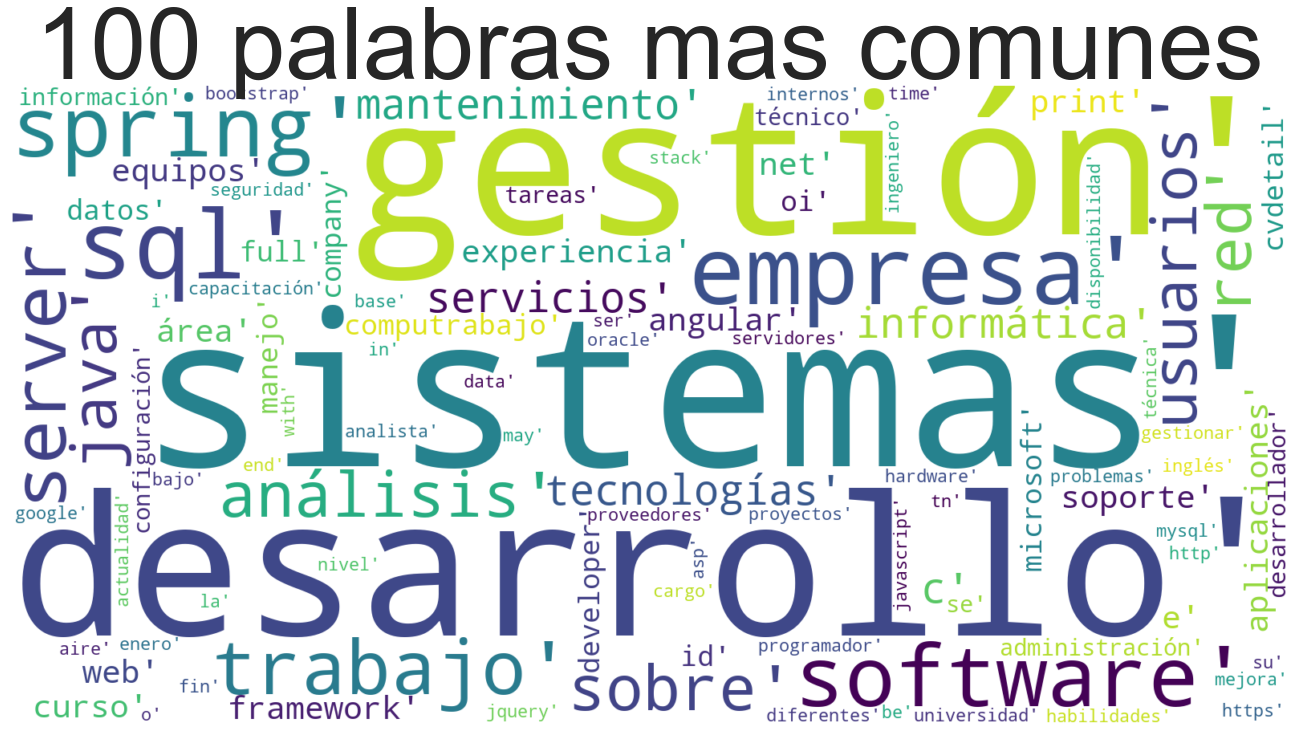

In [801]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('100 palabras mas comunes', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

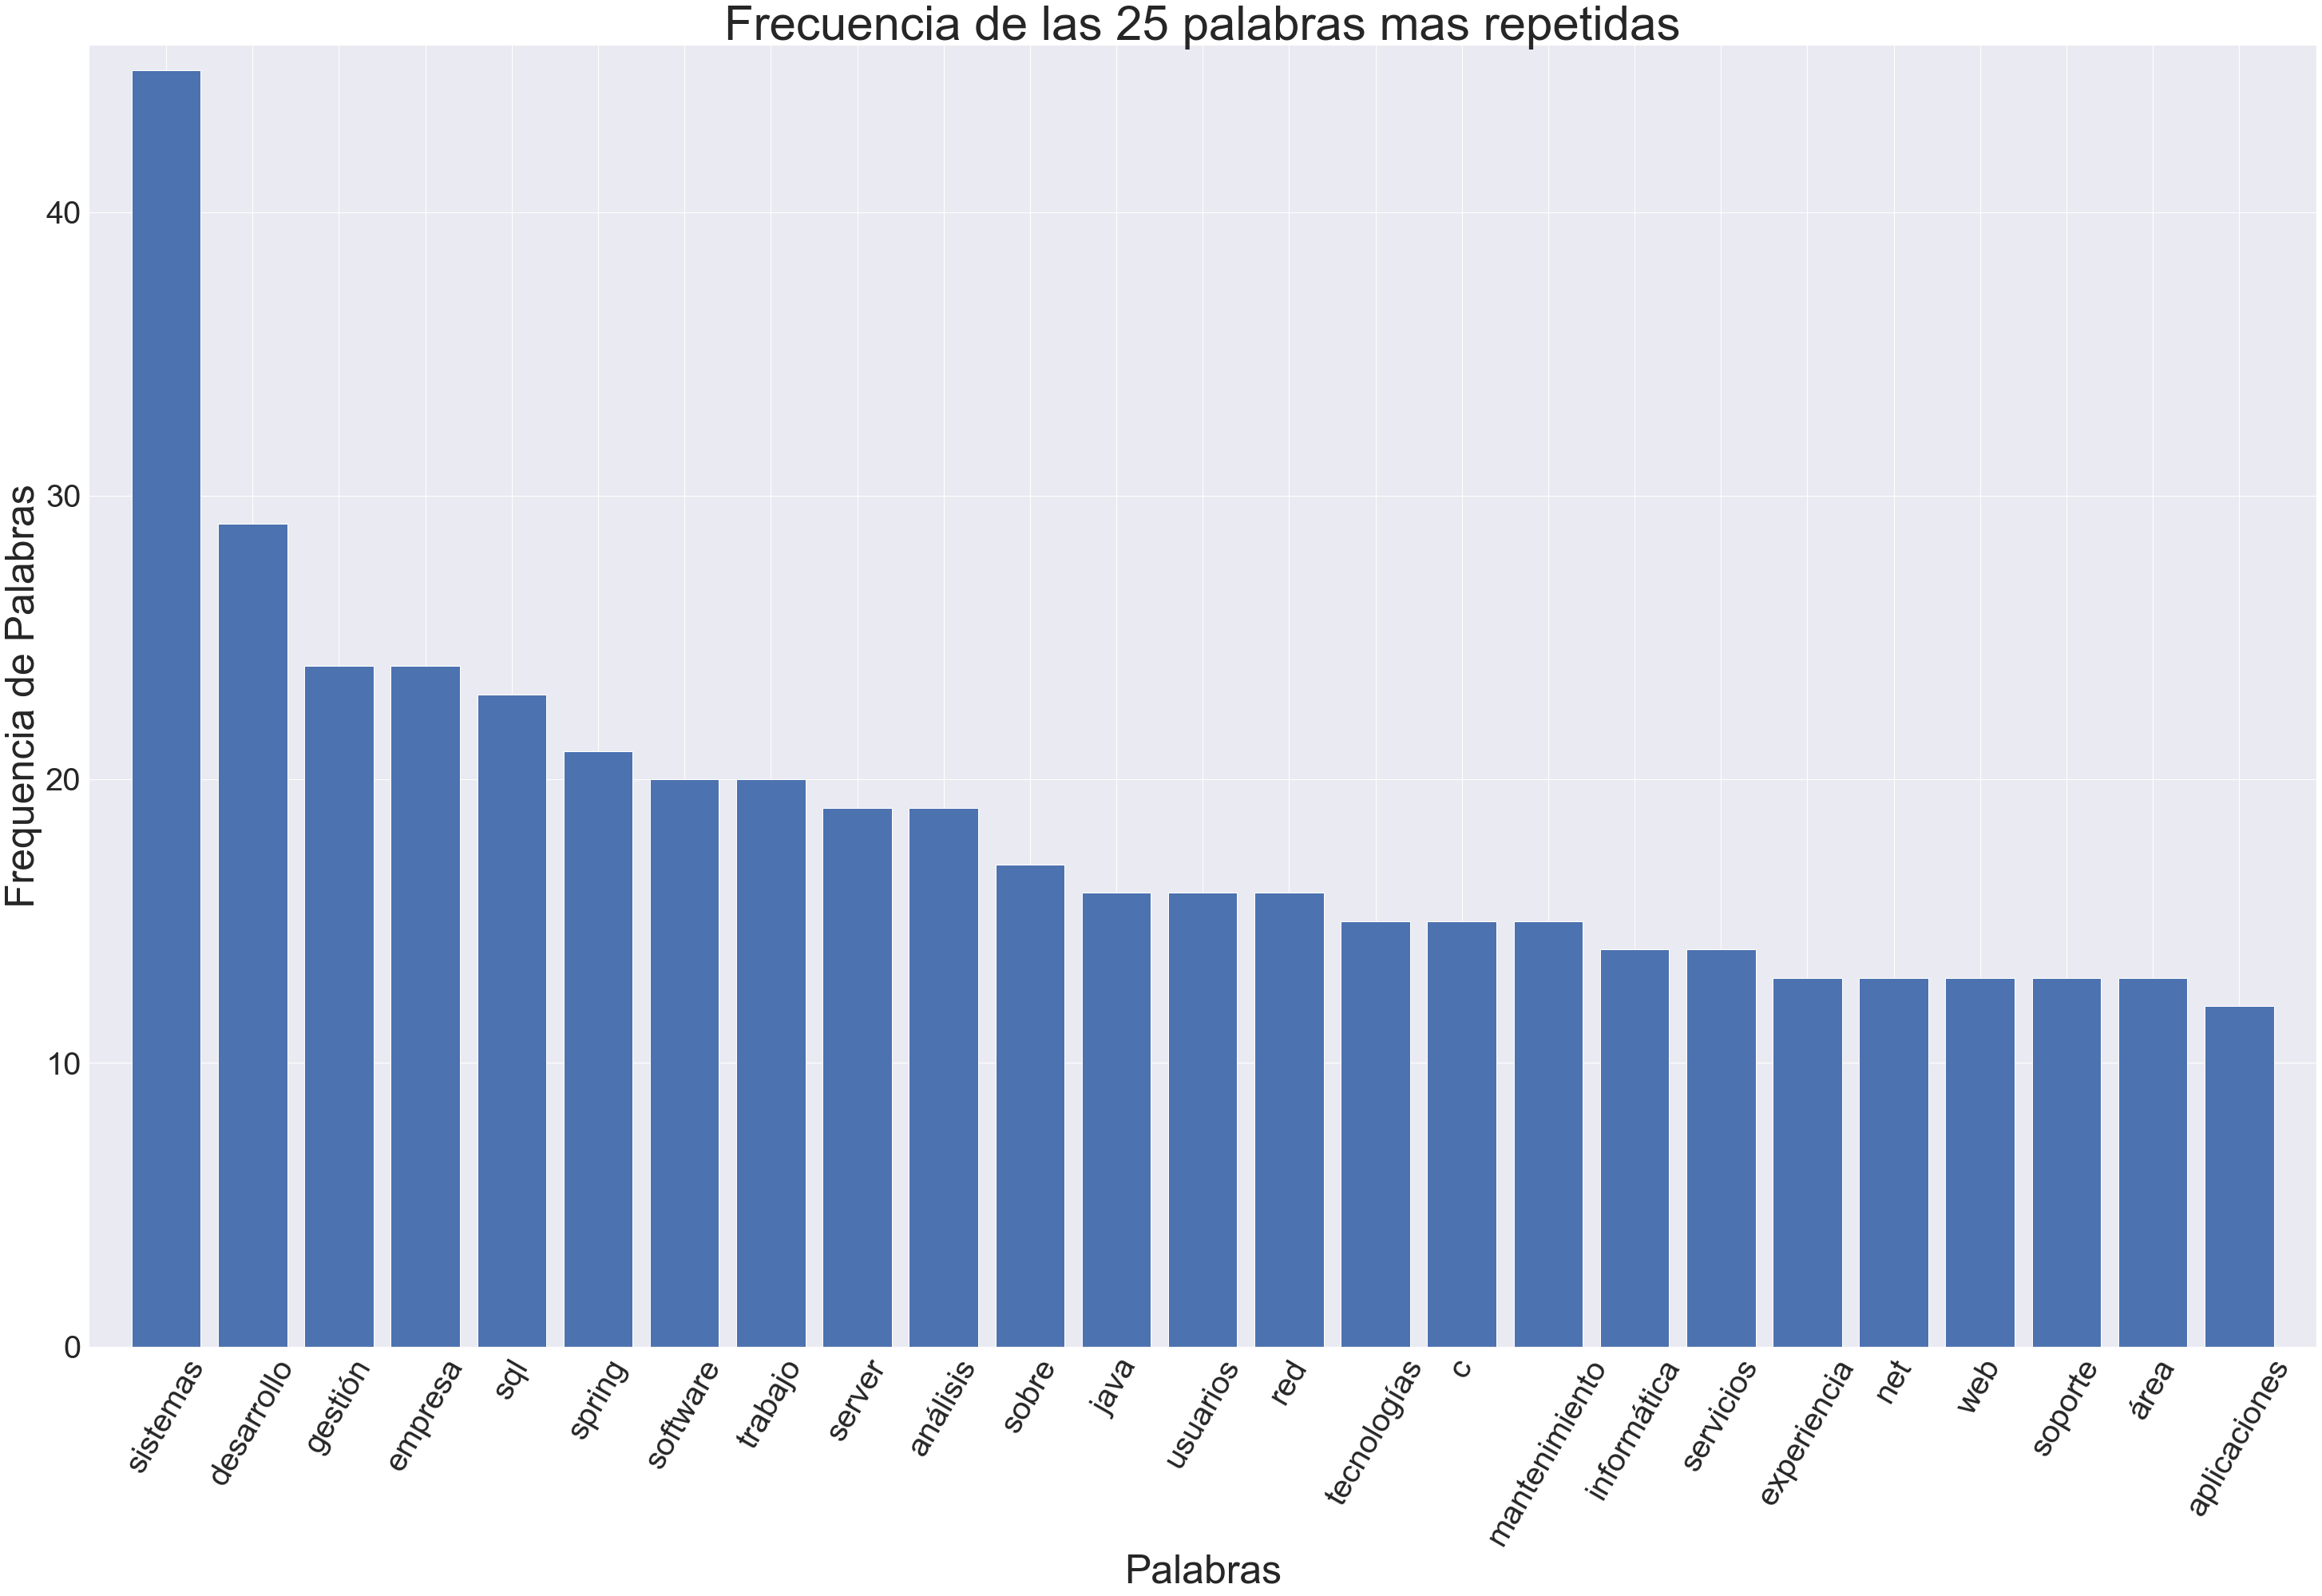

In [804]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Palabras', fontsize=50)
plt.ylabel('Frequencia de Palabras', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frecuencia de las 25 palabras mas repetidas', fontsize=60)
plt.show()

# Modelado por Tema

Finally, let’s apply a few topic modeling algorithms to help derive specific topics or themes for our reviews. Before we have determined the topics for each rating we have to perform one additional processing step. Right now our data/words are still readable to us human beings whereas computers only understand numbers. We need to convert our text into numbers or vectors.

## CountVectorizer

The CountVectorizer method of vectorizing tokens transposes all the words/tokens into features and then provides a count of occurrence of each word. The result is called a document term matrix, which you can see below.
First, we create the vectorizer object. Max_df=0.9 will remove words that appear in more than 90% of the reviews. Min_df=25 will remove words that appear in less than 25 reviews. Next, we create the spare matrix as the result of fit_transform(). Finally, we create a list of all the words/features. The result is our document term matrix. Each row represents individual employee reviews and counts of how many times each word/feature occurs in each review.

In [831]:
data_clean['lemma_str'] = [' '.join(map(str,l)) for l in data_clean['lemmatized']]
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=7, max_features=5000) #min_df debe estar unido a la cantidad de documentos
tf = tf_vectorizer.fit_transform(data_clean['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,desarrollo,experiencia,framework,gestión,inglés,la,sistemas,software,soporte,sql,web
0,5,1,1,2,1,0,6,4,0,5,1
1,0,0,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,2,0,4,0,0
3,0,0,1,0,1,0,0,0,0,0,3
4,1,0,0,1,0,0,4,1,1,1,0
5,5,1,2,1,0,0,2,3,1,3,2
6,5,2,3,0,1,1,2,2,0,3,2
7,4,1,2,3,1,1,6,1,0,5,3
8,0,2,0,5,1,1,4,3,1,1,0
9,7,1,1,7,0,1,5,0,2,5,1


In [818]:
#!pip install  pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=c9f29426068b5d0dfcfdd0869105354aaa927166efcb4cd7f36b237b3d60b88b
  Stored in directory: c:\users\jdiaz\appdata\local\pip\cache\wheels\3b\fb\41\e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491062 sha256=e2b8b5b224da0a3e73e9fb7788d9706583a062e91b04dcb9cf4046f4ba6ff4a3
  Stored in directory: c:\users\jdiaz\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=431d47731a93c6efa24909ac23b8cdcddc532aaf4d1871c95286d9bf6569228e
  Stored in directory: c:\users\jdiaz\appdata\local\pip\cache\wheels\3c\33\97\805b282e129f60bb4e87cea622338f30b65f21eaf65219971f
Successfully built pyLDAvis future funcy


You should consider upgrading via the 'C:\Users\jdiaz\.conda\envs\Ambiente1\python.exe -m pip install --upgrade pip' command.


# Latent Dirichlet Allocation (LDA) Topic Modeling

Now that we have prepared our data for topic modeling, we’ll be using the Latent Dirichlet Allocation (LDA) approach to determine the topics present in our corpus. In our model, we are going to produce 10 individual topics (ie. n_components). Once the model is created let’s create a function to display the identified topics. Each topic will consist of 10 words. The function will have three required parameters; the LDA model, feature names from the document term matrix, and the number of words per topic.

In [832]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
web desarrollo framework sql experiencia inglés software sistemas la soporte
Topic 1:
desarrollo sistemas sql gestión software web framework experiencia soporte la
Topic 2:
sql software soporte la framework gestión web sistemas desarrollo experiencia
Topic 3:
la inglés software sistemas web sql desarrollo soporte experiencia framework
Topic 4:
inglés software experiencia sql framework soporte web la sistemas desarrollo
Topic 5:
soporte sistemas la experiencia desarrollo framework web sql software gestión
Topic 6:
la gestión sql software web desarrollo framework inglés soporte sistemas
Topic 7:
sistemas software soporte gestión inglés desarrollo la experiencia sql framework
Topic 8:
gestión sistemas experiencia software inglés la soporte sql desarrollo web
Topic 9:
gestión sql soporte sistemas web experiencia desarrollo la software framework


In [838]:
import pyLDAvis
import sklearn
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  50.243066
7       0.648955  71.707100       2        1  15.521714
8      71.019684   9.971006       3        1  14.186049
0       3.785981  33.185135       4        1  12.931632
5     -42.666500  -9.222070       5        1   4.463014
4      -3.621689 -43.526516       6        1   0.530905
6      -3.632402  -4.171708       7        1   0.530905
3     -36.584400  35.804413       8        1   0.530905
9      44.391380  50.615383       9        1   0.530905
2      40.235809 -31.591665      10        1   0.530905, topic_info=          Term       Freq      Total Category  logprob  loglift
0   desarrollo  28.000000  28.000000  Default  11.0000  11.0000
9          sql  22.000000  22.000000  Default  10.0000  10.0000
6     sistemas  43.000000  43.000000  Default   9.0000   9.0000
3      gestión  23.000000  23.000000  Default   8.0000   8.0000
7     software  19.000000  19.000000  Default   7.0000   7.0000
..         ...        ...        ...      ...      ...      ...
7     software   0.099424  19.987289  Topic10  -2.3979  -0.0651
9          sql   0.099424  22.908189  Topic10  -2.3979  -0.2015
3      gestión   0.099424  23.842003  Topic10  -2.3979  -0.2415
0   desarrollo   0.099424  28.546233  Topic10  -2.3979  -0.4215
6     sistemas   0.099424  43.779165  Topic10  -2.3979  -0.8492

[121 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         1  0.735649   desarrollo
0         2  0.035031   desarrollo
0         4  0.175154   desarrollo
0         5  0.035031   desarrollo
1         1  0.302960  experiencia
1         2  0.075740  experiencia
1         3  0.378700  experiencia
1         4  0.151480  experiencia
1         5  0.075740  experiencia
2         1  0.530609    framework
2         4  0.442174    framework
3         1  0.545256      gestión
3         2  0.083886      gestión
3         3  0.335542      gestión
4         1  0.235104       inglés
4         2  0.235104       inglés
4         3  0.235104       inglés
4         4  0.235104       inglés
5         1  0.265011           la
5         2  0.132505           la
5         3  0.265011           la
5         4  0.132505           la
5         5  0.132505           la
6         1  0.433996     sistemas
6         2  0.319787     sistemas
6         3  0.159893     sistemas
6         4  0.045684     sistemas
6         5  0.045684     sistemas
7         1  0.400254     software
7         2  0.350223     software
7         3  0.150095     software
7         4  0.100064     software
8         1  0.227471      soporte
8         2  0.303295      soporte
8         3  0.151648      soporte
8         5  0.303295      soporte
9         1  0.785745          sql
9         3  0.043653          sql
9         4  0.130958          sql
10        1  0.530943          web
10        4  0.455094          web, R=11, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 9, 1, 6, 5, 7, 4, 10, 3])

# TF-IDF

LDA isn’t the only approach to topic modeling. Let’s try another method named the Non-Negative Matrix Factorization (NMF) approach and see if our topics can be slightly more defined. Instead of using the simple CountVectorizer method to vectorize our words/tokens, we’ll use the TF-IDF (Term Frequency — Inverse Document Frequency) method. The TF-IDF method helps to bring down the weight/impact of high-frequency words (ie. “work”, “Google” and ‘job” in our case).
Much like the CountVectorizer method we first create the vectorizer object. Max_df=0.9 will remove words that appear in more than 90% of the reviews. Min_df=25 will remove words that appear in less than 25 reviews. Next, we create the spare matrix as the result of fit_transform(). Finally, we create a list of all the words/features.

In [849]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =0.25, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(data_clean['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

,actualidad,actualmente,administración,analista,angular,análisis,aplicaciones,aptitude,asp,bajo,...,trabajos,técnica,técnico,universidad,uso,usuarios,utn,web,with,áreas
0,0.000000,0.000000,0.084453,0.000000,0.153157,0.000000,0.139843,0.094090,0.282269,0.076579,...,0.000000,0.000000,0.000000,0.069921,0.094090,0.084453,0.000000,0.064155,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.215860,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.180838,0.265219,0.000000
2,0.000000,0.000000,0.112032,0.000000,0.000000,0.406348,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.101587,0.224064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.096990,0.000000,0.000000,0.119169,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243764,0.595843,0.000000
4,0.403724,0.000000,0.000000,0.183042,0.000000,0.000000,0.167129,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.101348,0.000000,0.164972,0.000000,0.000000,0.225946,0.000000,0.000000,0.000000,...,0.000000,0.082486,0.000000,0.150630,0.101348,0.000000,0.090967,0.138207,0.000000,0.000000
6,0.038293,0.000000,0.000000,0.000000,0.208338,0.034723,0.000000,0.000000,0.000000,0.034723,...,0.000000,0.000000,0.114880,0.031704,0.000000,0.000000,0.000000,0.058179,0.042663,0.000000
7,0.000000,0.075520,0.000000,0.000000,0.061465,0.000000,0.112243,0.000000,0.075520,0.000000,...,0.000000,0.000000,0.000000,0.056121,0.000000,0.000000,0.067785,0.154478,0.000000,0.000000
8,0.062774,0.000000,0.125547,0.000000,0.000000,0.056921,0.000000,0.000000,0.000000,0.056921,...,0.069937,0.056921,0.125547,0.000000,0.000000,0.125547,0.062774,0.000000,0.000000,0.069937
9,0.051618,0.000000,0.000000,0.093611,0.000000,0.468057,0.128210,0.000000,0.115017,0.093611,...,0.057508,0.046806,0.103237,0.042737,0.000000,0.051618,0.000000,0.039212,0.000000,0.057508


<12x125 sparse matrix of type '<class 'numpy.float64'>'
	with 513 stored elements in Compressed Sparse Row format>

# Non-Negative Matrix Factorization (NMF)

In [854]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
sobre server net desarrollo sql jquery mvc mantenimiento datos base
Topic 1:
in with end developer web time angular bootstrap framework java
Topic 2:
informática microsoft sistema febrero google telecomunicaciones pc desk seguridad problemas
Topic 3:
análisis diferentes soporte red manejo end técnico servicios outlook core
Topic 4:
spring desarrollador bootstrap angular data stack full jquery técnico desarrollo
Topic 5:
sistemas actualidad manejo junior nacional general desarrollador base analista información
Topic 6:
tecnologías developer sql desarrollo asp software sistemas net proyecto javascript
Topic 7:
servicios proveedores curso mantenimiento equipos gestión seguridad sistemas software habilidades
Topic 8:
empresa usuarios red trabajo disponibilidad sistemas administración informática software hardware
Topic 9:
análisis nivel trabajo java gestión server desarrollo sql tecnologías sistemas


Let’s add both the LDA and NMF topics into our dataframe for further analysis. Let’s also remap the integer topics into our subjectively derived topic labels.

In [858]:
nmf_topic_values = nmf.transform(tfidf)
data_clean['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
data_clean['lda_topics'] = lda_topic_values.argmax(axis=1)
lda_remap = {0: 'Good Design Processes', 1: 'Great Work Environment', 2: 'Flexible Work Hours', 3: 'Skill Building', 4: 'Difficult but Enjoyable Work', 5: 'Great Company/Job', 6: 'Care about Employees', 7: 'Great Contractor Pay', 8: 'Customer Service', 9: 'Unknown1'}
data_clean['lda_topics'] = data_clean['lda_topics'].map(lda_remap)
nmf_remap = {0: 'Fun Work Culture', 1: 'Design Process', 2: 'Enjoyable Job', 3: 'Difficult but Enjoyable Work', 
             4: 'Great Experience', 5: 'Perks', 6: 'Learning Opportunities', 7: 'Great Company/Job', 
             8: 'Contractor Employee Experience', 9: 'Management'}
data_clean['nmf_topics'] = data_clean['nmf_topics'].map(nmf_remap)

Examining the frequency of topics produced by NMF we can see that the first 5 topics show up at a relatively similar frequency. Keep in mind these are the topics across all reviews (positive, neutral, and negative) and if you recall our dataset is negatively skewed as the majority of the reviews are positive.

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text xticklabel objects>)

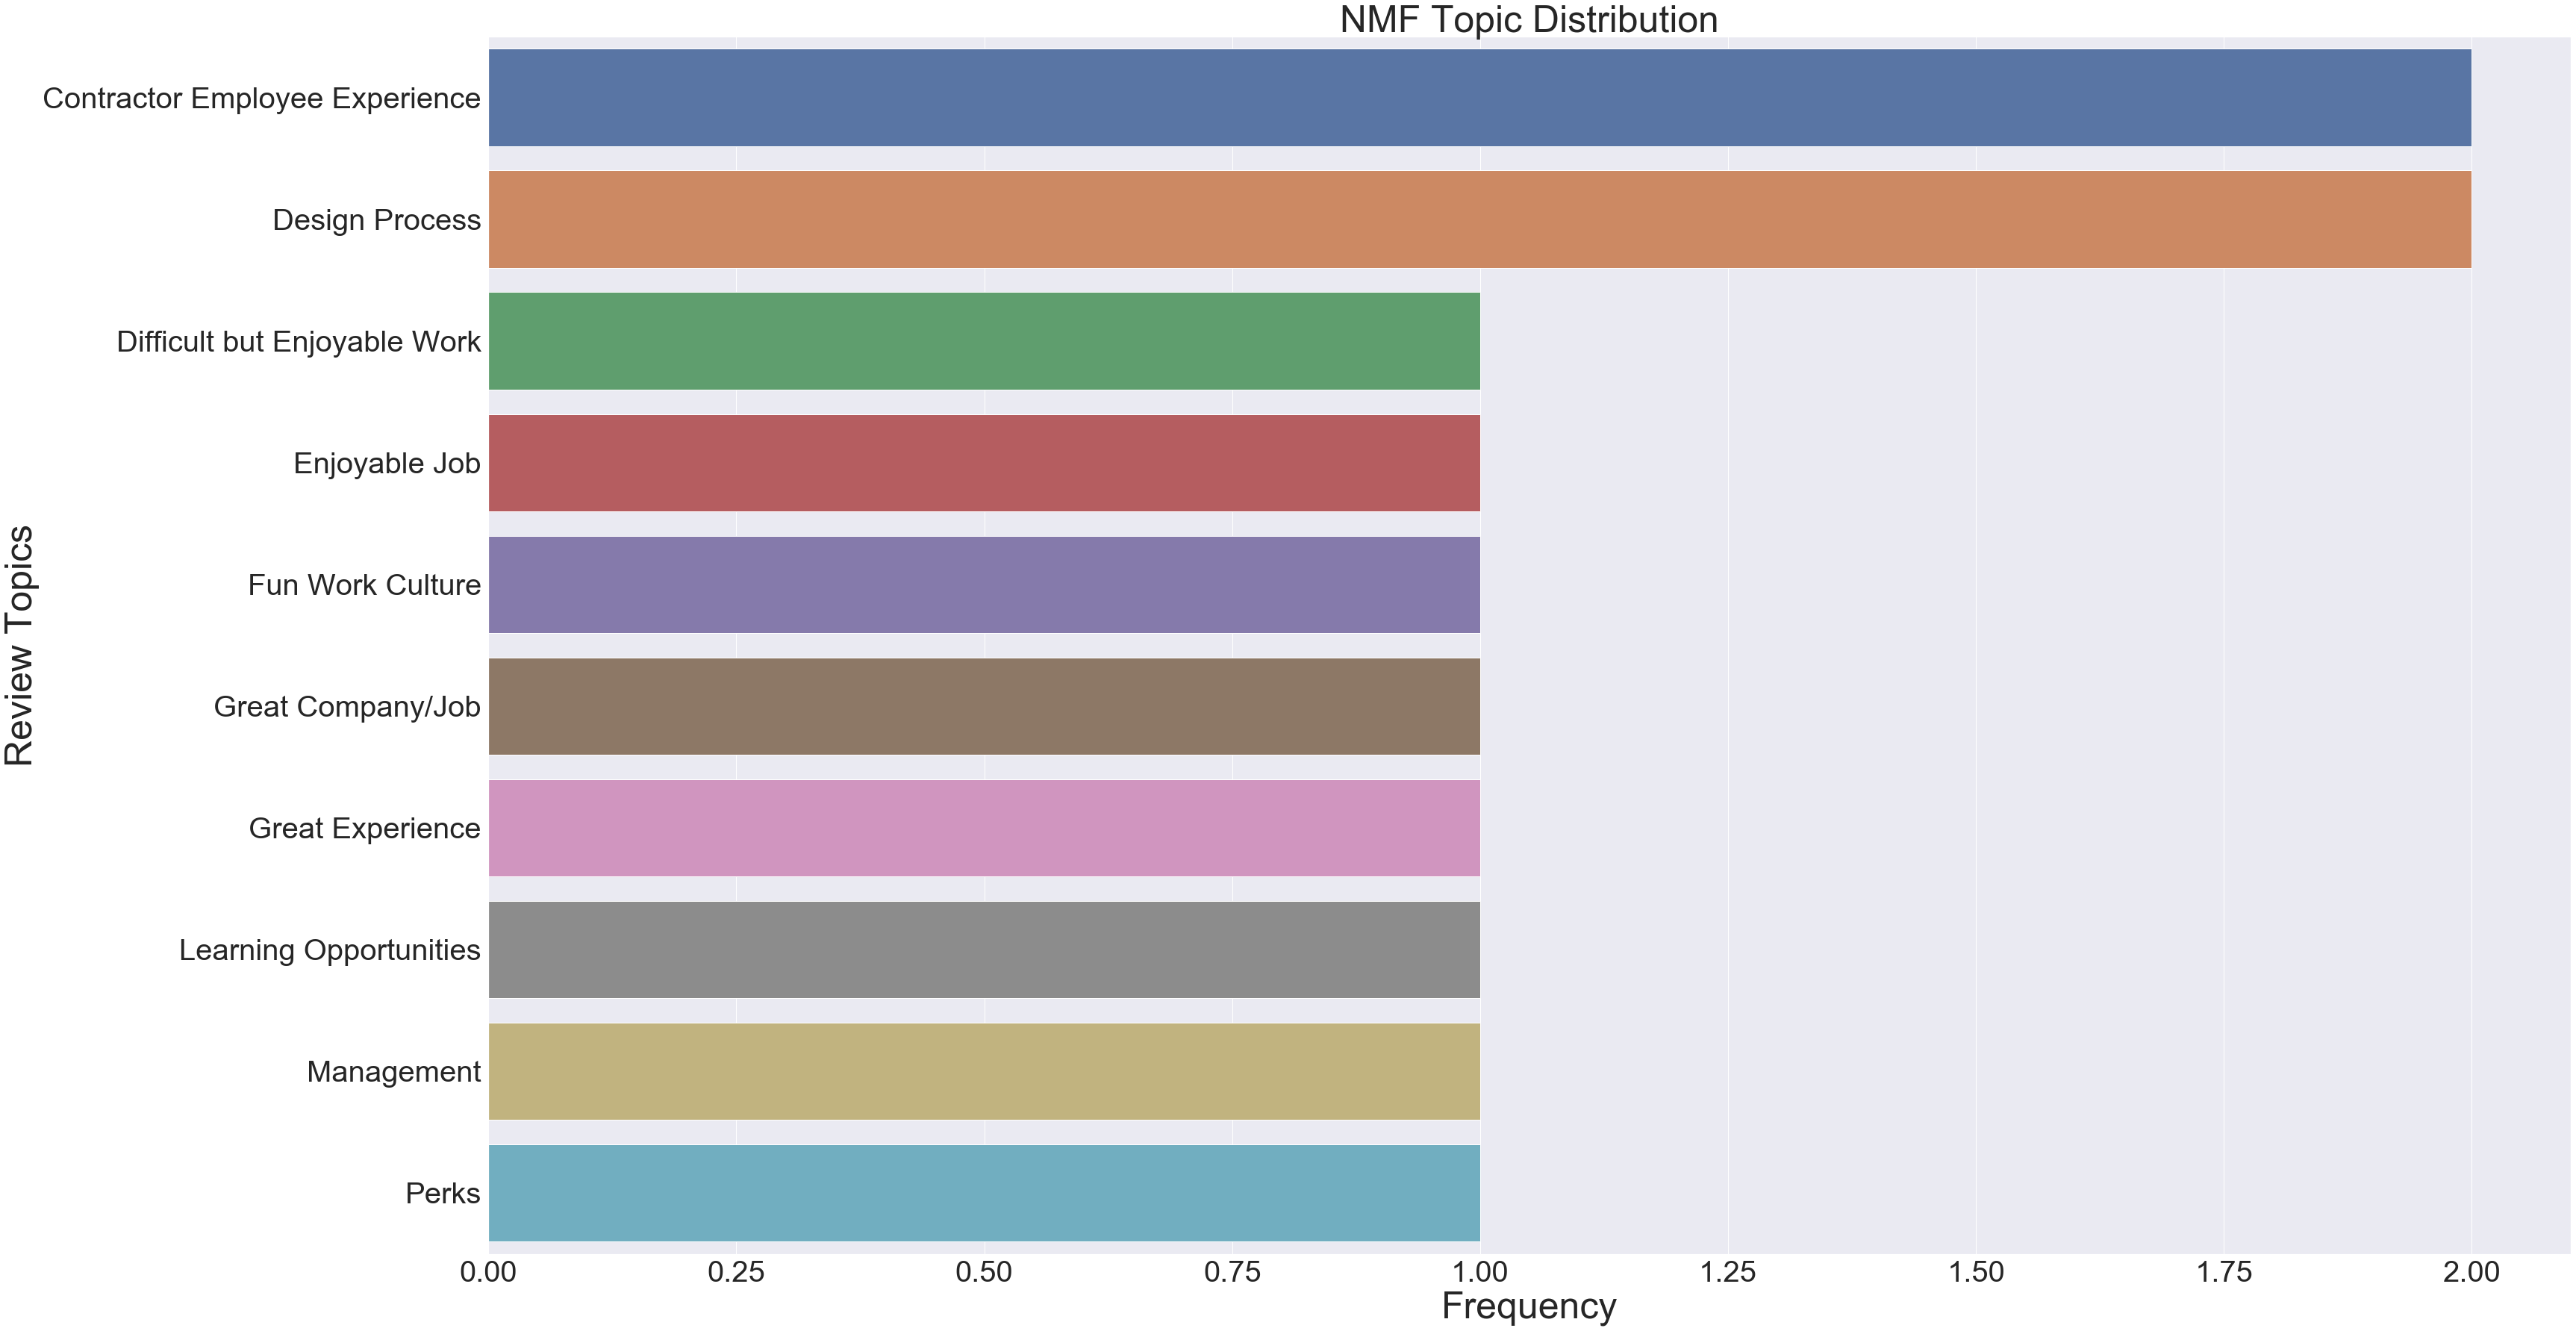

In [859]:
nmf_x = data_clean['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

Let’s split our data and examine the topics for the negative reviews based on ratings of 1 and 2. It is interesting to see that despite the negative ratings the employees still overwhelmingly enjoyed their work, culture, and the company overall. It is very difficult to obtain an accurate perspective on the topics for negative reviews due to the skewness of our dataset (ie. the relatively small amount of negative reviews).

# Clasificación de CVs usando KNN

In [861]:
from sklearn.cluster import KMeans

def kmeans(n_clusters):
    kmean_model = KMeans(n_clusters = n_clusters,random_state=0)
    return kmean_model

#### KMeans Clustering Reinforced With Doc2Vec

In [865]:
conda install gensin

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - gensin

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [867]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-2.0.0-py3-none-any.whl size=101346 sha256=c051dc46aea1724ad8baa0533843d17f78a84b1338996b72360756c11a5c1b2e
  Stored in directory: c:\users\jdiaz\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de
Successfully built smart-open


You should consider upgrading via the 'C:\Users\jdiaz\.conda\envs\Ambiente1\python.exe -m pip install --upgrade pip' command.


In [868]:
# Primero creamos la instancia Doc2Vec
import gensim
from gensim.models import Doc2Vec

def doc2vec():
    document_tagged = []
    tagged_count = 0
    for _ in data_clean['lemma_str'].values:
        document_tagged.append(gensim.models.doc2vec.TaggedDocument(_,[tagged_count]))
        tagged_count +=1 
    d2v = Doc2Vec(document_tagged)
    d2v.train(document_tagged,epochs=d2v.epochs,total_examples=d2v.corpus_count)
    return d2v.docvecs.vectors_docs

C:\Users\jdiaz\.conda\envs\Ambiente1\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [869]:
%time doc2vec = doc2vec()

Wall time: 107 ms


In [870]:
X = doc2vec

In [871]:
kmeans5 = KMeans(5)

%time km5 = kmeans5.fit_predict(X)

Wall time: 32.9 ms


In [872]:
kmeans6 = KMeans(6)
%time km6 = kmeans6.fit_predict(X)


Wall time: 28 ms


In [873]:
kmeans7 = KMeans(7)
%time km7 = kmeans7.fit_predict(X)

Wall time: 34.9 ms


In [874]:
data_clean['cluster_doc2vec_kmeans'] = kmeans6.labels_

In [875]:
# Generamos reducción de la dimensionalidad
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(X)
data = pca.transform(X)
centroids =  pca.transform(kmeans6.cluster_centers_)

<Figure size 3600x1440 with 0 Axes>

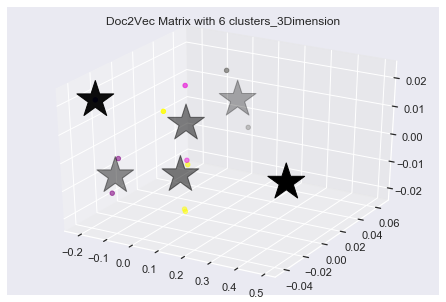

In [876]:
from mpl_toolkits.mplot3d import Axes3D
color_code= ['#FFFF00', '#008000', '#0000FF', '#800080','#5e5d58','#e817d7']
color = [color_code[i] for i in list(data_clean['cluster_doc2vec_kmeans'])]
plt.figure(figsize=(50,20))
axis = Axes3D(plt.figure())
axis.scatter(data[:, 0], data[:, 1],data[:, 2],c = color)
axis.scatter(centroids[:, 0], centroids[:, 1], centroids[:,2], marker='*', s=1500, c='#000000')
plt.title("Doc2Vec Matrix with 6 clusters_3Dimension")
plt.show()

### Clustering 2D

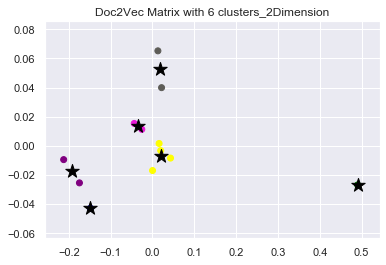

In [879]:
pca = PCA(n_components=2).fit(X)
data = pca.transform(X)
centroids =  pca.transform(kmeans6.cluster_centers_)
plt.scatter(data[:, 0], data[:, 1],c = color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#000000')
plt.title("Doc2Vec Matrix with 6 clusters_2Dimension")
plt.show()

In [880]:
# Valores de salidas del modelo
dataframe =pd.DataFrame()
dataframe['cluster'] = data_clean['cluster_doc2vec_kmeans']
dataframe['x'] =data[:, 0]
dataframe['y'] =data[:, 1]

In [881]:
dataframe.dropna(inplace=True)

In [883]:
data_clean.to_csv('C:/Users/jdiaz/Desktop/Salida_Kmeans/output.csv')

In [884]:
dataframe

,cluster,x,y
0,0,0.019720,-0.003286
1,3,-0.212242,-0.009482
3,0,0.015866,0.001603
4,3,-0.174560,-0.025458
5,1,0.490435,-0.026869
8,0,0.000211,-0.016982
10,2,-0.148305,-0.042937
13,0,0.043144,-0.008427
14,4,0.021769,0.039942
15,5,-0.043559,0.015362
